In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the stoich_45 feature set

- 9 elemental properties (i.e., atomic number, group number, period number, electronegativity, electron affinity, melting temperature, boiling temperature, density, and ionization energy), and
- 5 statistical quantities (i.e., standard mean, geometric mean, standard deviation, maximum value, and minimum value) of elemental properties

- do not encode any information about the structural properties, only chemical composition of each material


In [3]:
# Read the csv file for features for QMOF dataset
# stoich45
df_fp = pd.read_csv('../data/QMOF/qmof_database/qmof_database/relaxed_structures_fingerprints/stoich45_fingerprints.csv', sep=',')
df_fp

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,density_mean,density_geometric_mean,density_standard_deviation,density_max,density_min,ionization_energy_mean,ionization_energy_geometric_mean,ionization_energy_standard_deviation,ionization_energy_max,ionization_energy_geometric_min
0,qmof-0000295,4.840000,2.833720,5.689851,29.0,1.0,7.960000,3.991657,6.749696,16.0,...,991.514712,4.182460,1912.665927,8960.0,0.0899,1233.652000,1223.402105,146.933016,1402.3,745.5
1,qmof-00019ff,6.160494,3.696834,7.475816,35.0,1.0,9.790123,5.722078,6.461120,17.0,...,1268.620262,23.314272,1455.767729,8900.0,0.0899,1205.481481,1198.057939,131.447336,1402.3,760.4
2,qmof-0001b0d,4.982301,3.323008,4.774531,30.0,1.0,9.318584,5.295894,6.452365,16.0,...,1285.340051,21.643255,1546.598997,8900.0,0.0899,1193.978761,1186.951791,126.964974,1402.3,760.4
3,qmof-0003ae4,5.125000,3.915946,2.847696,8.0,1.0,9.875000,5.471130,6.918047,16.0,...,632.433350,9.465604,955.356975,2260.0,0.0899,1157.362500,1115.508932,259.170918,1313.9,520.2
4,qmof-000512e,7.400000,6.724170,3.088689,19.0,1.0,13.700000,11.500180,4.313931,16.0,...,721.626295,15.205775,1023.803409,2260.0,0.0899,1218.510000,1187.405501,219.174061,1402.3,418.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20369,qmof-fff0df1,4.852941,3.061308,5.047611,29.0,1.0,8.676471,4.605269,6.676211,16.0,...,1094.694428,8.472108,1743.749437,8960.0,0.0899,1216.669118,1207.703553,139.305687,1402.3,745.5
20370,qmof-fff4e91,5.652174,3.627508,5.857798,30.0,1.0,9.739130,5.683942,6.441829,16.0,...,1293.323270,19.449685,1662.683156,7140.0,0.0899,1196.652174,1189.732816,126.320937,1313.9,906.4
20371,qmof-fffa2d9,9.214286,5.231450,10.631346,56.0,1.0,11.000000,6.622890,6.881653,17.0,...,610.714507,4.941293,1077.738281,3510.0,0.0899,1222.228571,1205.732522,164.349362,1313.9,502.9
20372,qmof-fffd0e2,6.423077,3.917995,7.150433,35.0,1.0,10.000000,6.002496,6.330634,17.0,...,1291.114698,21.226806,1625.387651,7140.0,0.0899,1209.240385,1201.115960,138.735819,1402.3,906.4


### Load the processed dataset for HSE06 DFT level

In [4]:
# Read the csv file for specific DFT level for QMOF dataset
df_hse06 = pd.read_csv('df_hse06.csv', sep=',')
df_hse06

,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume,qmof_id
0,HSE06,2.901747,['[Zn][Zn]'],"['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...",[O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...,102,1.33452,2.03948,1.596537,1148.155557,qmof-644aab4
1,HSE06,3.742023,['[OH2][Dy]([OH2])[OH2]'],"['[O-]C(=O)C(=O)[O-]', '[O-]C(=O)c1ncnc(c1)C(=...",[O-]C(=O)C(=O)[O-].[O-]C(=O)c1ncnc(c1)C(=O)[O-...,108,1.12484,2.84758,2.363811,1198.848870,qmof-85a8986
2,HSE06,4.504094,"['O', '[Ba]']",['[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O'],O.[Ba].[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O,132,0.99905,1.95298,2.238027,1346.122104,qmof-07d3562
3,HSE06,3.511018,['[Cd]'],['n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1'],[Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1,134,1.13178,2.11419,1.573802,1373.690229,qmof-9883029
4,HSE06,3.807474,['I[Cd]I'],['COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)...,COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)c1...,126,1.21638,2.69022,1.873856,1401.471537,qmof-f224151
...,...,...,...,...,...,...,...,...,...,...,...
10806,HSE06,2.518369,['[Fe]'],['n1ccc(cc1)c1ccc(cc1)c1ccncc1'],[Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1,67,1.18551,2.89246,1.495041,707.036341,qmof-f73a75b
10807,HSE06,2.149613,NaN,NaN,NaN,66,1.37328,2.56785,1.711368,786.642474,qmof-600a106
10808,HSE06,3.956167,NaN,NaN,NaN,74,1.12322,2.17481,1.692097,755.001744,qmof-64eac3c
10809,HSE06,4.557899,['[OH2][Nd][OH2]'],['[O-]C(=O)Cn1nnc(n1)c1cccnc1'],[O-]C(=O)Cn1nnc(n1)c1cccnc1.[OH2][Nd][OH2],100,1.01659,1.93464,1.892463,1095.155492,qmof-92305e2


### Import features from the features dataset to DFT dataset by matching qmof_id in each

In [5]:
# Merge the DataFrames on the matching columns
df_hse06_stoich45 = pd.merge(df_fp, df_hse06, left_on='MOF', right_on='qmof_id', how='right')

# Drop the 'MOF' column if it's no longer needed
df_hse06_stoich45.drop(columns=['qmof_id'], inplace=True)

# Display the combined DataFrame
print(df_hse06_stoich45.head())

# Save the combined DataFrame to a new CSV file
#df_hse06_stoich45.to_csv('df_hse06_combined.csv', index=False)

            MOF  atomic_num_mean  atomic_num_geometric_mean  \
0  qmof-644aab4         5.509804                   3.785929   
1  qmof-85a8986         7.481481                   4.293024   
2  qmof-07d3562         6.666667                   3.794343   
3  qmof-9883029         4.925373                   3.199733   
4  qmof-f224151         6.031746                   3.039263   

   atomic_num_standard_deviation  atomic_num_max  atomic_num_min  \
0                       4.815712            30.0             1.0   
1                      11.830189            66.0             1.0   
2                       9.421660            56.0             1.0   
3                       5.935759            48.0             1.0   
4                      10.459246            53.0             1.0   

   group_num_mean  group_num_geometric_mean  group_num_standard_deviation  \
0       10.176471                  6.220580                      6.245644   
1       11.074074                  6.807643               

Dataset with stoich_45 features:

In [6]:
df_hse06_stoich45

,MOF,atomic_num_mean,atomic_num_geometric_mean,atomic_num_standard_deviation,atomic_num_max,atomic_num_min,group_num_mean,group_num_geometric_mean,group_num_standard_deviation,group_num_max,...,inputs.hse06.theory,outputs.hse06.bandgap,info.mofid.smiles_nodes,info.mofid.smiles_linkers,info.mofid.smiles,info.natoms,info.pld,info.lcd,info.density,info.volume
0,qmof-644aab4,5.509804,3.785929,4.815712,30.0,1.0,10.176471,6.220580,6.245644,16.0,...,HSE06,2.901747,['[Zn][Zn]'],"['[O-]C(=O)c1cccc(c1)c1nccs1', 'n1ccc(cc1)c1cc...",[O-]C(=O)c1cccc(c1)c1nccs1.[Zn][Zn].n1ccc(cc1)...,102,1.33452,2.03948,1.596537,1148.155557
1,qmof-85a8986,7.481481,4.293024,11.830189,66.0,1.0,11.074074,6.807643,6.621659,19.0,...,HSE06,3.742023,['[OH2][Dy]([OH2])[OH2]'],"['[O-]C(=O)C(=O)[O-]', '[O-]C(=O)c1ncnc(c1)C(=...",[O-]C(=O)C(=O)[O-].[O-]C(=O)c1ncnc(c1)C(=O)[O-...,108,1.12484,2.84758,2.363811,1198.848870
2,qmof-07d3562,6.666667,3.794343,9.421660,56.0,1.0,9.636364,5.306805,6.944883,16.0,...,HSE06,4.504094,"['O', '[Ba]']",['[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O'],O.[Ba].[O-]C(=O)c1cc(cc(c1)S([O])([O])[O])C(=O)O,132,0.99905,1.95298,2.238027,1346.122104
3,qmof-9883029,4.925373,3.199733,5.935759,48.0,1.0,9.164179,5.098033,6.528004,16.0,...,HSE06,3.511018,['[Cd]'],['n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1'],[Cd].n1cc([nH]c1)c1ccc(cc1)c1[nH]cnc1,134,1.13178,2.11419,1.573802,1373.690229
4,qmof-f224151,6.031746,3.039263,10.459246,53.0,1.0,8.380952,4.376674,6.636667,17.0,...,HSE06,3.807474,['I[Cd]I'],['COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)...,COc1c(cc(c(c1c1c(C)c(C)cc(c1OC)c1ccncc1)C)C)c1...,126,1.21638,2.69022,1.873856,1401.471537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,qmof-f73a75b,4.895522,3.369970,4.096356,26.0,1.0,9.402985,5.449563,6.336485,16.0,...,HSE06,2.518369,['[Fe]'],['n1ccc(cc1)c1ccc(cc1)c1ccncc1'],[Fe].n1ccc(cc1)c1ccc(cc1)c1ccncc1,67,1.18551,2.89246,1.495041,707.036341
10807,qmof-600a106,6.121212,3.979014,6.318600,29.0,1.0,10.121212,6.304840,6.084046,16.0,...,HSE06,2.149613,NaN,NaN,NaN,66,1.37328,2.56785,1.711368,786.642474
10808,qmof-64eac3c,5.297297,3.540660,4.964005,30.0,1.0,9.783784,5.667693,6.518726,16.0,...,HSE06,3.956167,NaN,NaN,NaN,74,1.12322,2.17481,1.692097,755.001744
10809,qmof-92305e2,6.140000,3.859853,8.330690,60.0,1.0,10.440000,6.261201,6.539602,19.0,...,HSE06,4.557899,['[OH2][Nd][OH2]'],['[O-]C(=O)Cn1nnc(n1)c1cccnc1'],[O-]C(=O)Cn1nnc(n1)c1cccnc1.[OH2][Nd][OH2],100,1.01659,1.93464,1.892463,1095.155492


Distribution of the target – band gap:

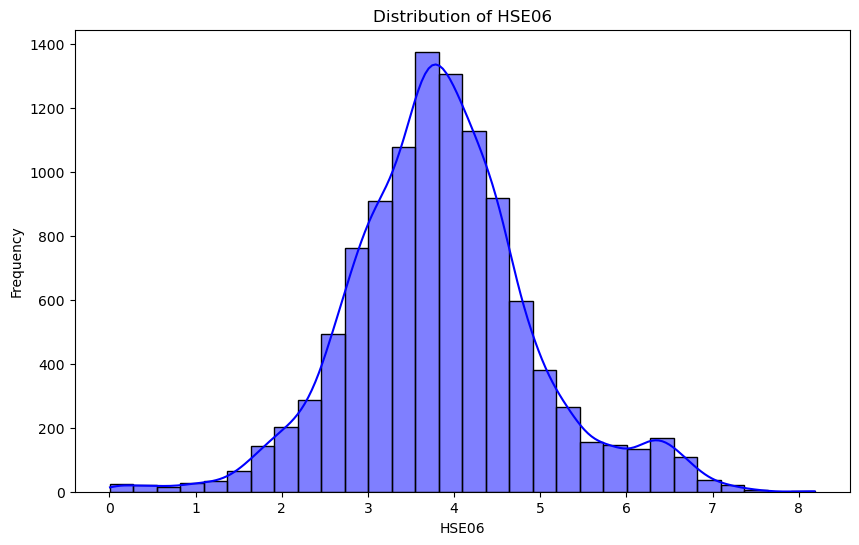

In [7]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_hse06_stoich45['outputs.hse06.bandgap'], bins=30, kde=True, color='blue')
plt.title('Distribution of HSE06')
plt.xlabel('HSE06')
plt.ylabel('Frequency')
plt.show()

## 1. Pariwise correlation between target and other features

- shows the linear relationships between pairs of features.
- to identify features that are highly correlated with each other, which might indicate redundancy.

outputs.hse06.bandgap                   1.000000
electronegativity_standard_deviation    0.379741
group_num_standard_deviation            0.325231
ionization_energy_mean                  0.280608
ionization_energy_geometric_mean        0.223016
electron_affinity_min                   0.136577
electronegativity_max                   0.126032
electronegativity_mean                  0.124003
ionization_energy_standard_deviation    0.089364
group_num_max                           0.085695
period_num_standard_deviation           0.050231
period_num_max                          0.046056
info.density                            0.044484
electronegativity_geometric_mean        0.029857
atomic_num_standard_deviation           0.025963
atomic_num_max                          0.020600
info.natoms                            -0.012833
info.pld                               -0.054120
electron_affinity_geometric_mean       -0.055253
atomic_num_mean                        -0.059350
info.lcd            

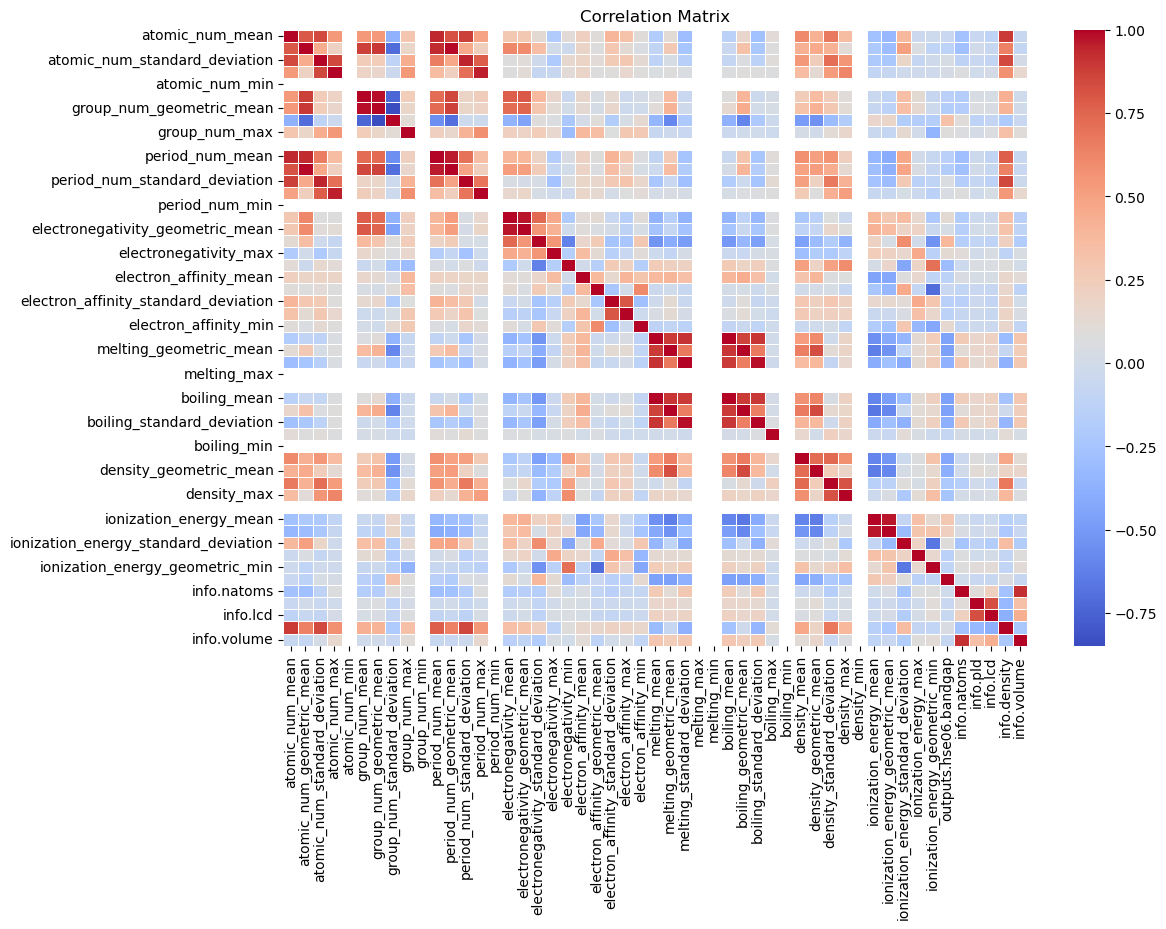

In [8]:
# Feature correlation with target variable for numerical features, ignore the 'MOF' column
# Filter the DataFrame to include only numerical columns
df_numerical = df_hse06_stoich45.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Get the correlation of each numerical feature with the target variable 'outputs.hse06.bandgap'
target_corr = corr_matrix['outputs.hse06.bandgap'].sort_values(ascending=False)

# Display the correlations with the target variable
print(target_corr)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Process dataset further to keep only target – band gap and 45 features (dropping non-numerical and info columns):

In [9]:
# Drop the 'MOF' and 'inputs.*.theory' columns
# And columns that have the format 'info.*' in the column name
df_hse06_stoich45.drop(columns=['MOF', 'inputs.hse06.theory'], inplace=True)
df_hse06_stoich45.drop(columns=df_hse06_stoich45.filter(regex='info.*').columns, inplace=True)

# print column names and number of columns
print(df_hse06_stoich45.columns)
print('number of columns:', len(df_hse06_stoich45.columns))

Index(['atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 'density_geometric_mean',

## 2. Calculate variance and identify low variance features below a specified threshold

- to calculate the variance (how much a feature (or a combination of features) varies or spreads out across the dataset) of each feature and identify low variance features.
- higher variance means that a feature’s values differ a lot from sample to sample — it carries information that distinguishes data points.
- low variance means that a feature’s values are almost constant, and thus less informative for a model because it doesn’t help differentiate between instances.
- features with very low variance might not provide much information to the model and can be considered for removal.
- the correlation matrix is then used to further analyze the relationships between the remaining features.


Variances of features:
atomic_num_mean                         3.018364e+00
atomic_num_geometric_mean               6.658008e-01
atomic_num_standard_deviation           1.390245e+01
atomic_num_max                          3.237383e+02
atomic_num_min                          0.000000e+00
group_num_mean                          1.338146e+00
group_num_geometric_mean                1.728096e+00
group_num_standard_deviation            1.599050e-01
group_num_max                           1.102735e+00
group_num_min                           0.000000e+00
period_num_mean                         2.224522e-02
period_num_geometric_mean               1.522011e-02
period_num_standard_deviation           3.427718e-02
period_num_max                          8.271362e-01
period_num_min                          0.000000e+00
electronegativity_mean                  9.303336e-03
electronegativity_geometric_mean        7.099619e-03
electronegativity_standard_deviation    1.156731e-02
electronegativity_max  

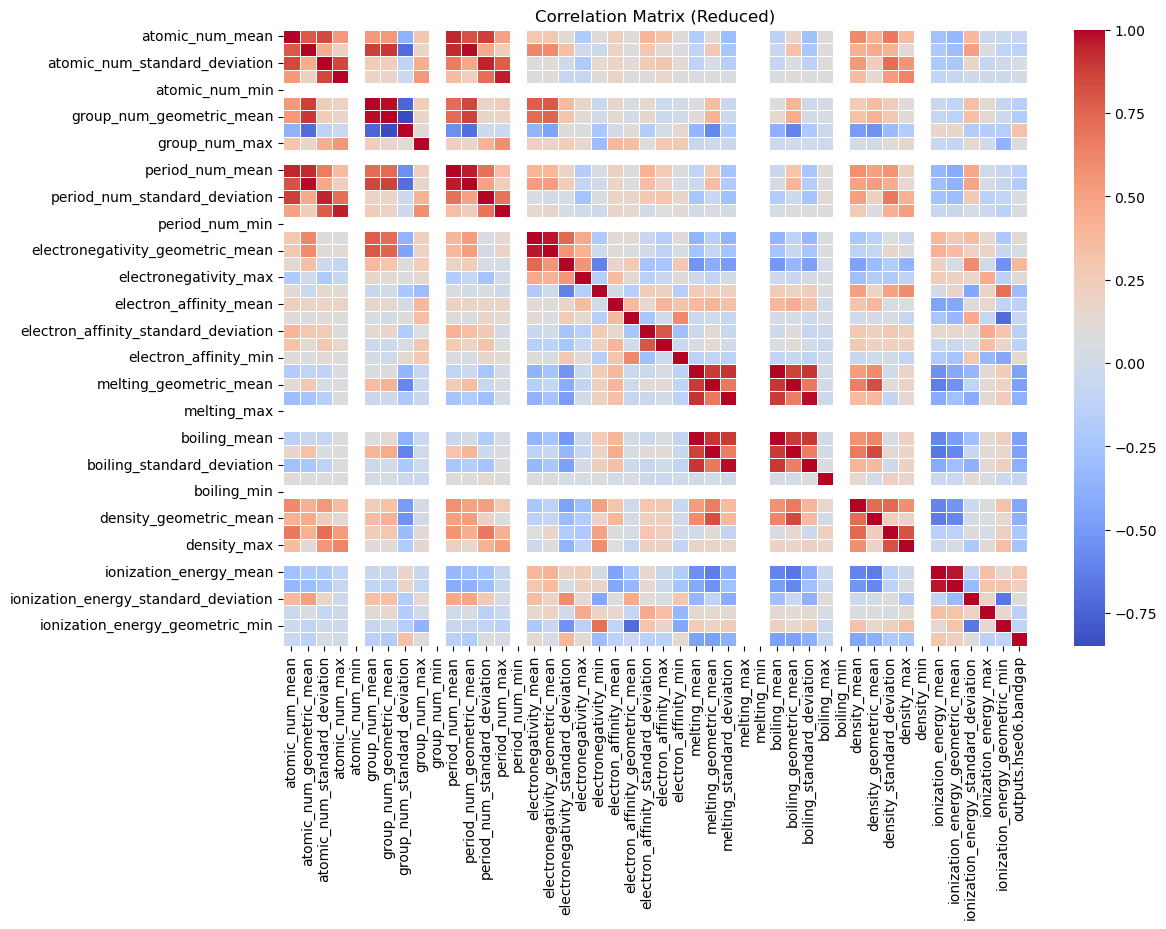

In [10]:
# Calculate the variance of each feature
variances = df_hse06_stoich45.var()

# Display the variances
print("Variances of features:")
print(variances)

# Identify low variance features (e.g., variance below a threshold)
threshold = 0.01  # adjust this threshold based on the dataset
low_variance_features = variances[variances < threshold].index

print("\nLow variance features:")
print(low_variance_features)

# Drop low variance features from the DataFrame
df_hse06_stoich45_reduced = df_hse06_stoich45.drop(columns=low_variance_features)

# Calculate the correlation matrix for the reduced DataFrame
corr_matrix_reduced = df_hse06_stoich45.corr()

# Plot the correlation matrix for the reduced DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_reduced, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix (Reduced)')
plt.show()

## 3. Feature importance by Mean Decrease in Impurity (MDI) method in Random Forest model

- a measure of feature importance used in decision tree-based models, such as Random Forests.
- quantifies the importance of a feature by calculating the total reduction in impurity (e.g., Gini impurity or entropy) that the feature brings to the model across all the trees in the forest.
- features with higher MDI values are considered more important because they contribute more to reducing impurity in the dataset. These features are more influential in making accurate predictions.

In [11]:
#  Mean decrease in impurity using the random forest model for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Drop the target variable from the DataFrame
X = df_hse06_stoich45.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45['outputs.hse06.bandgap']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get the feature importances from the model
feature_importances = rf.feature_importances_

# Get the column names from the DataFrame
column_names = X.columns

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({'feature': column_names, 'importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(feature_importances_df)



                                 feature  importance
26                melting_geometric_mean    0.216117
38                           density_max    0.078038
7           group_num_standard_deviation    0.064395
19                 electronegativity_min    0.058473
17  electronegativity_standard_deviation    0.033193
22  electron_affinity_standard_deviation    0.032120
37            density_standard_deviation    0.031418
35                          density_mean    0.030338
20                electron_affinity_mean    0.029738
36                density_geometric_mean    0.028591
31                boiling_geometric_mean    0.027200
42  ionization_energy_standard_deviation    0.025714
44       ionization_energy_geometric_min    0.025374
3                         atomic_num_max    0.024644
2          atomic_num_standard_deviation    0.021441
12         period_num_standard_deviation    0.019601
16      electronegativity_geometric_mean    0.019093
40                ionization_energy_mean    0.

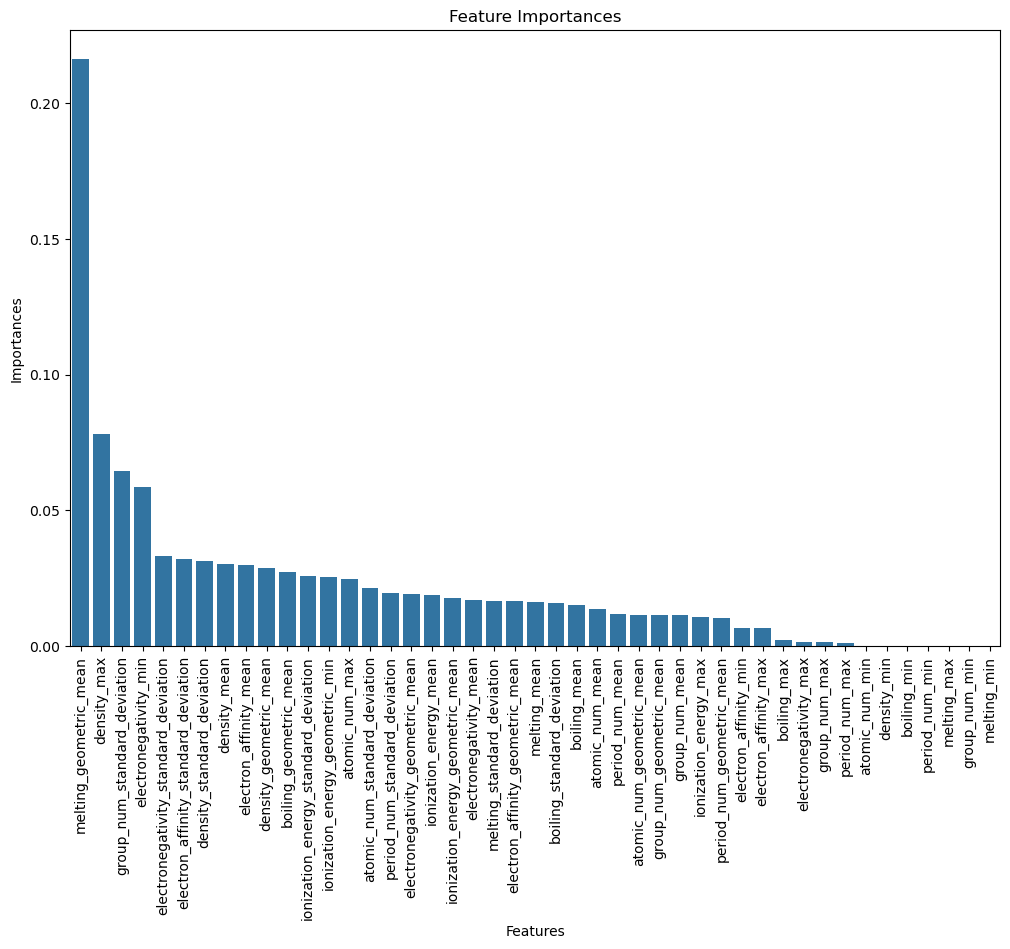

In [12]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.xticks(rotation=90, fontsize=10)
plt.show()

## 4. Feature importance by permutation importance

- calculates feature importances using permutation importance with the same Random Forest model.
- calculate feature importances by measuring the change in model performance when each feature is randomly shuffled.
- provides an additional measure of variability (standard deviations) for the importances.

In [13]:
# Permutation importance using the random forest model for feature importance

from sklearn.inspection import permutation_importance


# Calculate the mean decrease in impurity for each feature
result = permutation_importance(rf, X_test, y_test, scoring='neg_mean_squared_error', n_repeats=30, random_state=42)

# Get the feature importances and standard deviations
importances = result.importances_mean
std = result.importances_std

# Ensure the feature names match the columns in X_test
features = X_test.columns

# Create a DataFrame with the feature importances
importances_df = pd.DataFrame({'feature': features, 'importance': importances, 'std': std})

# Sort the DataFrame by feature importance in descending order
importances_df = importances_df.sort_values(by='importance', ascending=False)

# Display the DataFrame
print(importances_df)


                                 feature  importance       std
26                melting_geometric_mean    0.344371  0.020914
38                           density_max    0.181080  0.012616
3                         atomic_num_max    0.102805  0.009612
19                 electronegativity_min    0.082466  0.007375
44       ionization_energy_geometric_min    0.040173  0.004026
43                 ionization_energy_max    0.039841  0.005388
7           group_num_standard_deviation    0.029607  0.003649
35                          density_mean    0.029334  0.003643
37            density_standard_deviation    0.025510  0.002521
17  electronegativity_standard_deviation    0.021764  0.002901
31                boiling_geometric_mean    0.017177  0.002683
36                density_geometric_mean    0.015583  0.001998
2          atomic_num_standard_deviation    0.014666  0.001986
27            melting_standard_deviation    0.013303  0.001751
22  electron_affinity_standard_deviation    0.011331  0

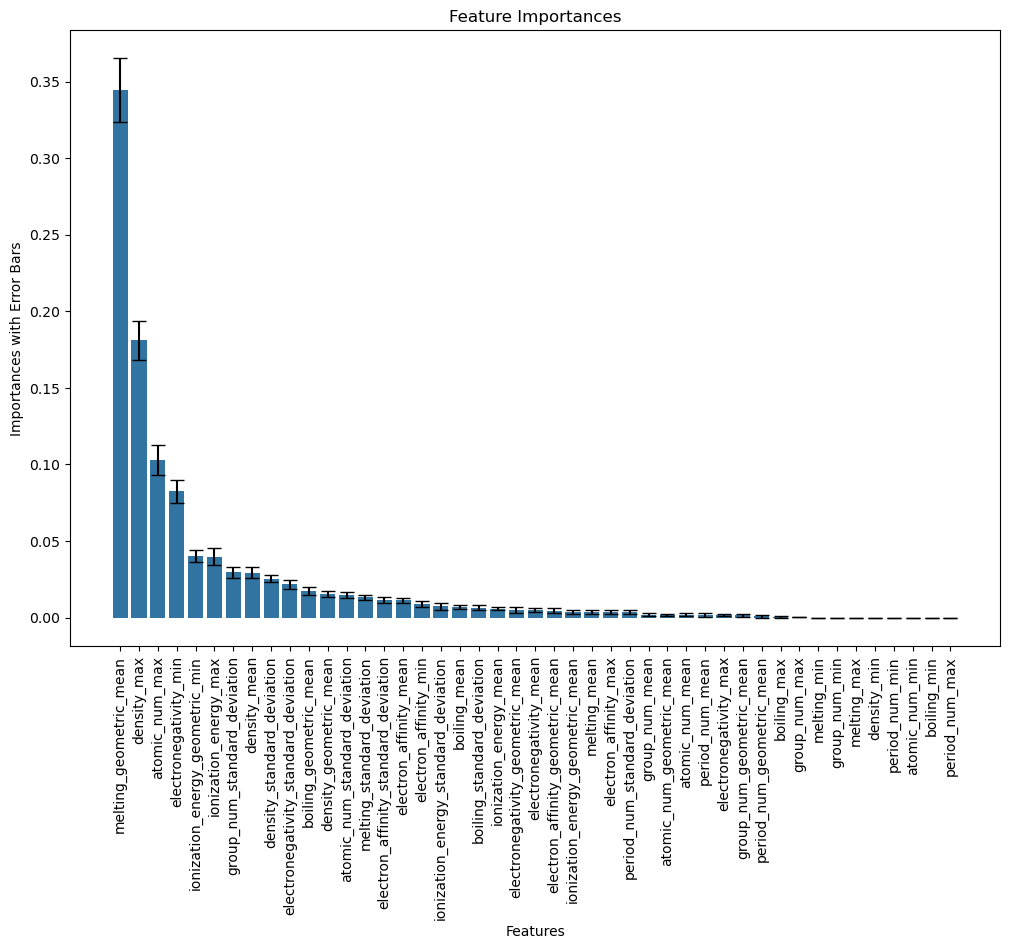

In [14]:
# Plot the feature importances with error bars
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=importances_df, capsize=5)
plt.errorbar(importances_df['feature'], importances_df['importance'], yerr=importances_df['std'].values, fmt='none', c='black', capsize=5)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importances with Error Bars')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [15]:
#plt.rcParams.update({'font.size': 22})
#plt.figure(figsize=(40, 10))

# Create a Series for the feature importances
#forest_importances = pd.Series(importances, index=[f[2:] for f in importances_df['feature']])

# Create a DataFrame to combine importances and standard deviations
#importances_df = pd.DataFrame({'importance': forest_importances, 'std': std})

# Sort the DataFrame by standard deviation
#importances_df = importances_df.sort_values(by='std', ascending=False)

# Plot the feature importances with error bars
#ax = importances_df['importance'].plot.bar(yerr=importances_df['std'], capsize=5)
#ax.set_title("Feature importances using MDI")
#ax.set_ylabel("Mean decrease in impurity")
#ax.set_xlabel("Features")
#plt.xticks(rotation=90)
#plt.show()

## 5. SHAP


```
# SHAP values for feature importance
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title('SHAP Summary Plot')
plt.show()

# Plot the SHAP summary plot for the entire dataset
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X, plot_type="bar")
plt.title('SHAP Summary Plot (Entire Dataset)')
plt.show()

```

## 6. PCA

- dimensionality reduction technique that transforms the original features into a new set of uncorrelated features called principal components while retaining most of the important information (variance).
- principal components are linear combinations of the original features and are ordered such that the first few retain most of the variation present in the original dataset.

- can visualize patterns, clusters, and relationships in the data that may not be apparent in the original high-dimensional space.

- not ideal for feature interpretability, since components are linear combinations of original features.
- but useful for detecting high redundancy, e.g., if only a few components explain 95% of variance, may have too many features.

- what PCA Tells About Features:
  - variance explained: tells you how much of the total variance in the data is captured by each principal component. The first principal component (PC1) captures the most variance, followed by the second principal component (PC2), and so on.
  - feature contributions:  provides information about the contribution of each original feature to the principal components. 

In [25]:
# Print NaN values in the DataFrame
print(df_hse06_stoich45.isna().sum())

# Remove rows with NaN values and create a new DataFrame
df_hse06_stoich45_for_pca = df_hse06_stoich45.dropna()

# Print number of rows dropped
print('number of rows dropped:', df_hse06_stoich45.shape[0] - df_hse06_stoich45_for_pca.shape[0])

# Print the number of rows and columns in the new DataFrame
print('number of rows and columns after dropping NaNs:', df_hse06_stoich45_for_pca.shape)

df_hse06_stoich45_for_pca.columns

atomic_num_mean                           0
atomic_num_geometric_mean                 0
atomic_num_standard_deviation             0
atomic_num_max                            0
atomic_num_min                            0
group_num_mean                            0
group_num_geometric_mean                  0
group_num_standard_deviation              0
group_num_max                             0
group_num_min                             0
period_num_mean                           0
period_num_geometric_mean                 0
period_num_standard_deviation             0
period_num_max                            0
period_num_min                            0
electronegativity_mean                  215
electronegativity_geometric_mean        215
electronegativity_standard_deviation    215
electronegativity_max                   215
electronegativity_min                   215
electron_affinity_mean                  146
electron_affinity_geometric_mean        146
electron_affinity_standard_devia

Index(['atomic_num_mean', 'atomic_num_geometric_mean',
       'atomic_num_standard_deviation', 'atomic_num_max', 'atomic_num_min',
       'group_num_mean', 'group_num_geometric_mean',
       'group_num_standard_deviation', 'group_num_max', 'group_num_min',
       'period_num_mean', 'period_num_geometric_mean',
       'period_num_standard_deviation', 'period_num_max', 'period_num_min',
       'electronegativity_mean', 'electronegativity_geometric_mean',
       'electronegativity_standard_deviation', 'electronegativity_max',
       'electronegativity_min', 'electron_affinity_mean',
       'electron_affinity_geometric_mean',
       'electron_affinity_standard_deviation', 'electron_affinity_max',
       'electron_affinity_min', 'melting_mean', 'melting_geometric_mean',
       'melting_standard_deviation', 'melting_max', 'melting_min',
       'boiling_mean', 'boiling_geometric_mean', 'boiling_standard_deviation',
       'boiling_max', 'boiling_min', 'density_mean', 'density_geometric_mean',

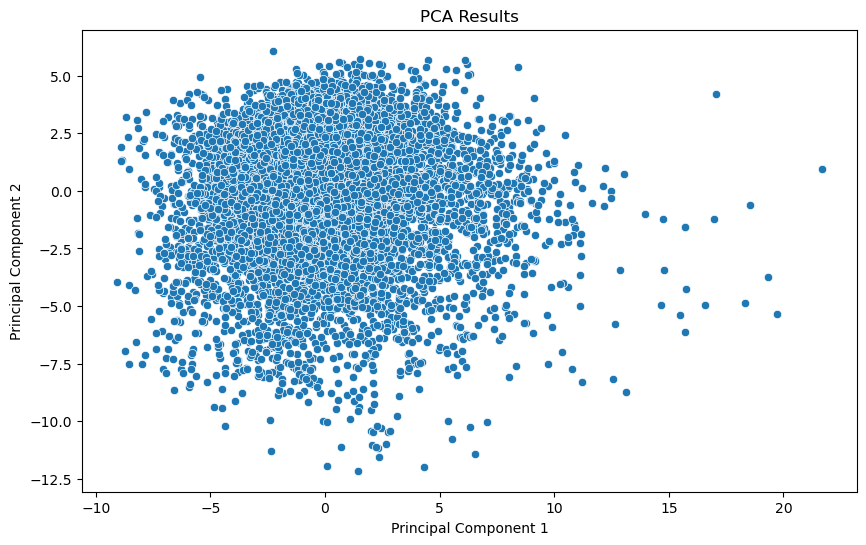

In [21]:
# PCA analysis
from sklearn.decomposition import PCA

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardize the features. Exclude the target variable
X = df_hse06_stoich45_for_pca.drop(columns=['outputs.hse06.bandgap'])
y = df_hse06_stoich45_for_pca['outputs.hse06.bandgap']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [26]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Loadings (coefficients of the original features in the principal components)
loadings = pca.components_
print("Loadings:", loadings)

Explained variance ratio: [0.25794422 0.202487  ]
Loadings: [[ 2.47238138e-01  2.40982600e-01  2.03982403e-01  1.58018818e-01
  -0.00000000e+00  2.06592570e-01  2.18507106e-01 -2.16816220e-01
   7.15408266e-02 -8.47032947e-22  2.64548855e-01  2.58453900e-01
   1.84919408e-01  1.41006459e-01  5.04870979e-29  5.16703902e-02
   7.33916506e-02 -5.05653564e-02 -4.88370460e-02  9.12958458e-02
   1.33004756e-01  2.82667868e-02  1.12136371e-01  9.75051807e-02
   8.09384637e-03  1.35744223e-01  2.19505697e-01  8.03303655e-02
  -6.76760465e-31 -0.00000000e+00  1.50864019e-01  2.28658188e-01
   8.64314604e-02  3.91386962e-02 -0.00000000e+00  2.70013042e-01
   2.44980859e-01  2.03954188e-01  1.50656596e-01 -2.06530904e-35
  -1.72935970e-01 -1.67700588e-01  6.15986920e-02  3.14393096e-02
   4.11952795e-02]
 [-1.70129345e-01 -1.96117115e-01 -1.09484013e-01 -4.78398069e-02
   0.00000000e+00 -1.60658658e-01 -1.41472258e-01  1.06990313e-02
  -1.02600657e-01  0.00000000e+00 -1.70855713e-01 -1.67453184e-